[YYYYMMDD]

# 2. Model 1

After Preparation ready. Build and train the model in here. (Describe the model)

## Goal
Find patterns on the features for target

## Plan
Checklist what will be done on the notebook :

        [ ] Get Data
        [ ] Modelling
                [ ] Hyper Parameter Tuning
                [ ] Feature selection (could be done with different notebook)
        [ ] Evaluation

In [18]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib
from statsmodels.tsa.arima.model import ARIMA
import sys
sys.path.insert(1,'../../src/')

## import myfunc inside src folder
from ramal import eval_model, jampi

In [19]:
with open("../../config.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

PATH_RAW = config['path']['raw']
PATH_INTERIM = config['path']['interim']
PATH_PROCESSED = config['path']['processed']
# PATH_MODEL = config['path']['artifact']+os.getcwd().split('\\')[-1]+'/'
PATH_MODEL = config['path']['artifact']+'iteration_1'+'/'
PATH_UDF = config['path']['udf']

## Get Data

In [20]:
ts2 = joblib.load(PATH_MODEL+'ramal_1-92.pkl')

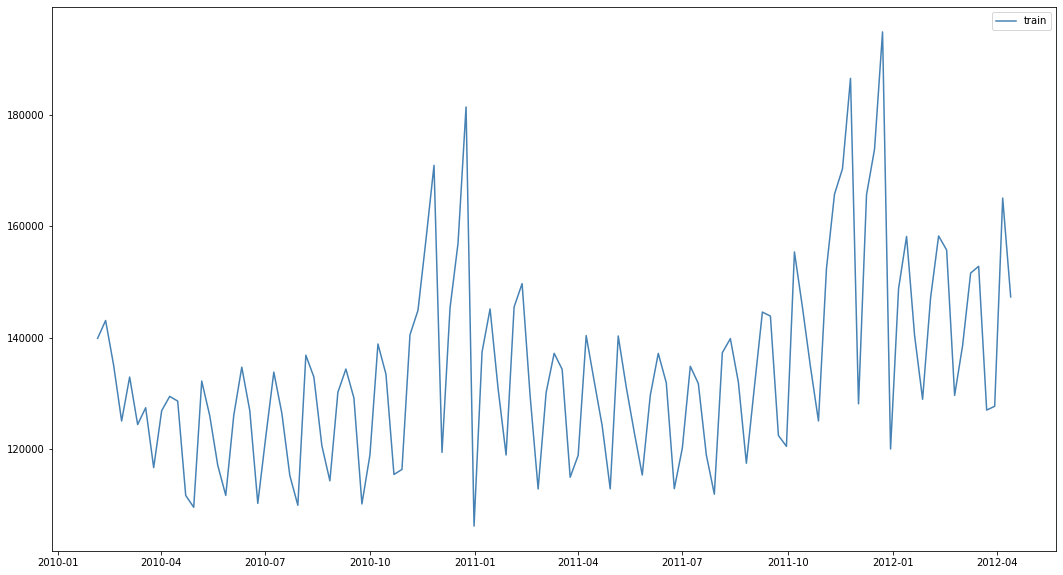

In [21]:
ts2.plot()

## Model 1

In [22]:
model1 = ARIMA(ts2.data, order=(3,1,2))
arima_model1 = model1.fit()
print(arima_model1.summary())

                               SARIMAX Results                                
Dep. Variable:                 wsales   No. Observations:                  115
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1259.414
Date:                Wed, 24 Aug 2022   AIC                           2530.829
Time:                        16:07:28   BIC                           2547.246
Sample:                    02-05-2010   HQIC                          2537.492
                         - 04-13-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6009      0.156     -3.862      0.000      -0.906      -0.296
ar.L2         -0.5465      0.083     -6.550      0.000      -0.710      -0.383
ar.L3         -0.4696      0.044    -10.753      0.0

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


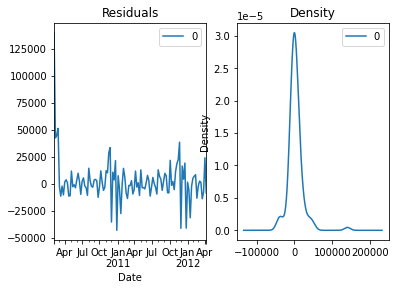

In [23]:
residuals = pd.DataFrame(arima_model1.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

## Eval

In [24]:
train_pred_wrap = arima_model1.get_prediction()

In [25]:
train_pred_wrap.summary_frame()

wsales,mean,mean_se,mean_ci_lower,mean_ci_upper
2010-02-05,0.000000,16422.023154,-32186.573934,32186.573934
2010-02-12,100482.824735,15725.328721,69661.746796,131303.902673
2010-02-19,89945.726952,14596.019016,61338.055364,118553.398540
2010-02-26,73740.013935,12964.069446,48330.904729,99149.123141
2010-03-05,135299.576237,12954.871994,109908.493704,160690.658770
...,...,...,...,...
2012-03-16,151326.370930,12953.475538,125938.025401,176714.716459
2012-03-23,140764.370372,12953.475538,115376.024843,166152.715901
2012-03-30,135064.801314,12953.475538,109676.455785,160453.146843
2012-04-06,140871.674516,12953.475538,115483.328987,166260.020045


In [26]:
# train_pred_wrap.conf_int()

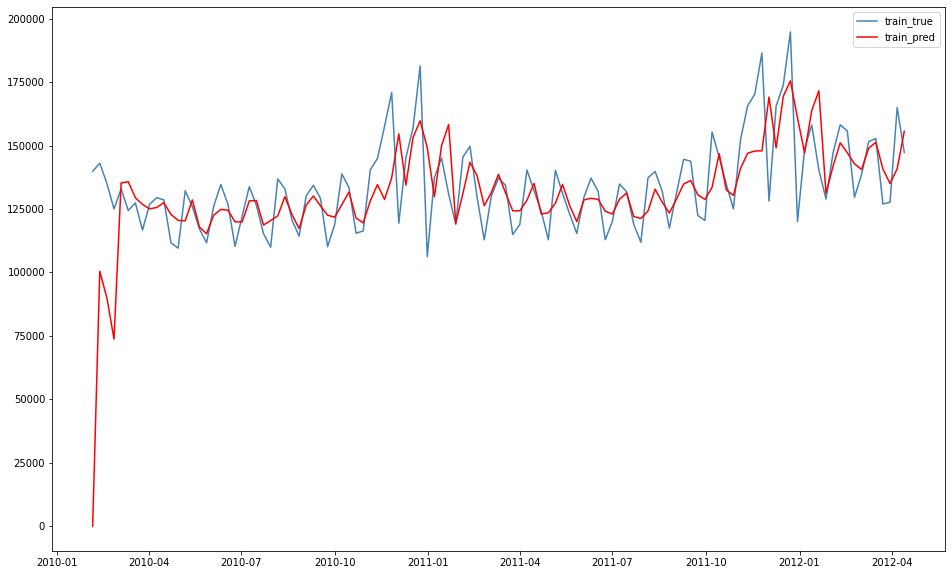

In [27]:
df_data_train = ts2.data
df_train_pred = train_pred_wrap.predicted_mean

## in sample
plt.figure(figsize=(16,10))
plt.plot(ts2.data, label='train_true', color='steelblue')

plt.plot(df_train_pred, label='train_pred', color='red')
plt.legend()

In [28]:
eval_model(ts2.data_1d(), df_train_pred)

{'MAE': 11452.669096372732,
 'MAPE': 0.08441556486670336,
 'MSE': 397480903.1002542,
 'over_est_0': 0.46956521739130436,
 'under_est_0': 0.5304347826086957,
 'R2': -0.33118735911448893}

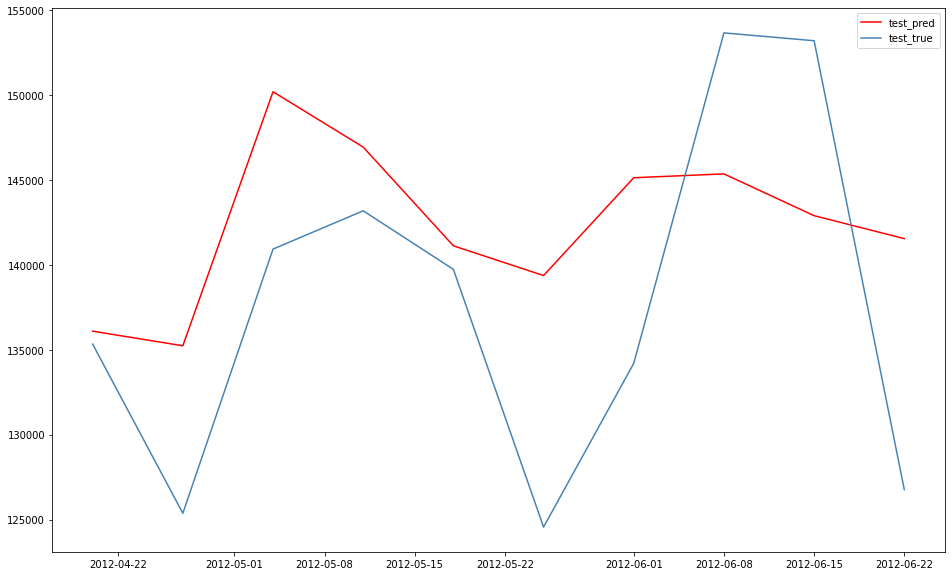

In [29]:
n_test = 10

df_data_test = ts2.data_test[:n_test]
df_test_pred = arima_model1.forecast(steps=n_test)

## in sample
plt.figure(figsize=(16,10))
plt.plot(df_test_pred, label='test_pred', color='red')
plt.plot(df_data_test,label='test_true', color='steelblue')
plt.legend()

In [30]:
eval_model(ts2.data_1d(test = 1)[:n_test], df_test_pred)

{'MAE': 8421.833708059798,
 'MAPE': 0.06248533550961242,
 'MSE': 93343288.83375847,
 'over_est_0': 0.8,
 'under_est_0': 0.2,
 'R2': 0.0693586891473752}